In [46]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [47]:
df = pd.read_csv("mobile_data.csv")


for i in range(df.shape[1] - 1):
    df.iloc[:,i] = df.iloc[:,i] / max(df.iloc[:,i])
print()
print(df.shape)
# df['Pixel Density'] = df['Pixel Density']/max(df['Pixel Density'])




(341, 12)


In [48]:
class MultivariateLinearRegression:
    def __init__(self,dataframe,initial_weights,normalize = False,test_size = 0.2):
        if normalize == True:
            for i in range(dataframe.shape[1] - 1):
                dataframe.iloc[:,i] = dataframe.iloc[:,i] / max(dataframe.iloc[:,i])
        self.is_model_ready = False
        self.x_train_df = dataframe.iloc[:,:-1]
        self.y_train_df = dataframe.iloc[:,-1]
        

        
        X = self.x_train_df # your features
        y = self.y_train_df # your labels
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(X, y, test_size=test_size, random_state=42)

        

        self.x_train = self.x_train.to_numpy()
        self.y_train = self.y_train.to_numpy()

        self.x_test = self.x_test.to_numpy()
        self.y_test = self.y_test.to_numpy()

        # print(f"\nself.x_test.shape = {self.x_test.shape}")
        # print(f"self.y_test.shape = {self.y_test.shape}\n")

        self.x_train = self.addDummy1ToList(x_train=self.x_train)
        self.x_test = self.addDummy1ToList(x_train=self.x_test)

        if len(initial_weights) == self.x_train[0].shape[0]:
            self.weights = np.array(initial_weights)
        else:
            raise ValueError('The Dimensions of the weight is not as per the dataset.\nPlease restart with new dimension of weights')
        
    def h_w(self,weights,X):
        return np.dot(weights,X)
    
    def error(self,weights,X,y):
        return self.h_w(weights=weights,X=X) - y
    
    def J(self):
        J_list = []
        for i in range(self.x_train.shape[0]):
            J_list.append((self.h_w(weights=self.weights,X=self.x_train[i]) - self.y_train[i])**2)
        
        cost = sum(J_list)/(2*self.x_train.shape[0])
        return cost
    
    def costInTestData(self):
        J_list = []
        for i in range(self.x_test.shape[0]):
            J_list.append((self.h_w(weights=self.weights,X=self.x_test[i]) - self.y_test[i])**2)
        
        cost = sum(J_list)/(2*self.x_test.shape[0])
        return cost
    
    def gradJ(self):
        dJ_dw_list = []
        for i in range(self.weights.shape[0]):
            dJ_dwi = []
            for j in range(self.x_train.shape[0]):
                dJ_dwi.append((self.error(weights=self.weights,X=self.x_train[j],y=self.y_train[j])) * self.x_train[j][i])

            dJ_dw_list.append( sum(dJ_dwi) / self.x_train.shape[0] )

        return np.array(dJ_dw_list)
    
    def new_point(self,alpha):
        return self.weights - alpha*self.gradJ()
    
    def constant_alpha_optimization(self,alpha = 0.01):
        i=0

        # CHECK IF THIS IS DEEP COPY OR SHALLOW COPY

        while i<10000 and np.linalg.norm(self.gradJ()) > 1e-3:
            self.weights = self.new_point(alpha=alpha)
            i+=1



            print(f"i = {i} \nnp.linalg.norm(self.gradJ()) = {np.linalg.norm(self.gradJ())}\nWeights = {self.weights}\n")




        print(f"\n\nFINAL Ws = {self.weights}")

        if i>=9999:
            print(f"The limit to the number of iteration has been reached.\n")
        elif np.linalg.norm(self.gradJ()) <= 1e-5:
            self.is_model_ready = True
            print(f"The grad of the cost function after the optimization has reached less than 1e-5")

    def FinalModel(self,X):
        '''
        Return the value of 'Y' as per the model for the given value of 'X'
        '''
        print(f"is_model_ready = {self.is_model_ready}")
        if self.is_model_ready:
            X = np.array(X)
            X = self.addDummy1ToList(x_train=X)
            return self.h_w(weights=self.weights,X=X)
        else:
            print("\nThe model is not yet made.\nPlease call the Class function constant_alpha_optimization() or any other method.\n")
        

    def setWeightsToZero(self):
        print(f"self.x_train[0].shape[0] = {self.x_train[0].shape[0]}")
        self.weights = np.zeros(self.x_train[0].shape[0])
        print(f"self.weights = {self.weights}")   
    
    def addDummy1ToList(self,x_train):
        '''
        x_train should be a numpy array
        '''
        # print(f"type(x_train[0]) = {type(x_train[0])}")
        if str(type(x_train[0])) == "<class 'numpy.float64'>":
            x_train2 = []
            for i in range(len(x_train)):
                x_train2.append(np.array([1,float(x_train[i])]))
            return np.array(x_train2)
        else:
            x_train2 = []
            for i in range(len(x_train)):

                x_train2.append(np.array([1,*list(x_train[i])]))

            return np.array(x_train2)
        
    def SStotal(self):
        self.average_y = sum(self.y_train) / self.y_train.shape[0]
        J_list = []
        for i in range(self.x_train.shape[0]):
            J_list.append((self.h_w(weights=self.weights,X=self.x_train[i]) - self.average_y)**2)
        
        SStotal = sum(J_list)/(2*self.x_train.shape[0])
        return SStotal
    
    def SSres(self):
        J_list = []
        for i in range(self.x_train.shape[0]):
            J_list.append((self.h_w(weights=self.weights,X=self.x_train[i]) - self.y_train[i])**2)
        
        SSres = sum(J_list)/(2*self.x_train.shape[0])
        return SSres
    
    def R_squared(self):
        R2 = 1 - (self.SSres()/self.SStotal())
        return R2
        
    # def lin_reg_plot(self):
    #     fig = plt.figure()
    #     ax = fig.add_subplot(111)
    #     ax.plot(self.x_train, self.y_train,'*')
    #     x = np.arange(0,1,0.01)
    #     y = self.weights[0] + self.weights[1] * x
    #     ax.plot(x,y)

    # def plot3d(self):
    #     x = np.linspace(-5,5,100)
    #     y = np.linspace(-5,5,100)
    #     fig = plt.figure()
    #     ax = plt.axes(projection='3d')

    #     X,Y = np.meshgrid(x,y)
    #     Z = self.J2(weights=np.array([X,Y]))
    #     ax.set_xlabel("X")
    #     ax.set_ylabel("Y")
    #     ax.set_zlabel("Z")
    #     ax.set_title("Cost Function")
    #     ax.plot_surface(X,Y,Z)
    #     plt.show()





In [49]:
# model1 = MultivariateLinearRegression(dataframe=df,initial_weights=[1 for i in range(12)])
model1 = MultivariateLinearRegression(dataframe=df,initial_weights=[ 3.23466563, -0.33470512, -0.40878738, -0.29330198 , 0.09131152 ,-0.30133482,  0.75811038  ,0.37479812,  0.69513935,  0.48741281 , 0.14810743, -0.05978171])
model1.constant_alpha_optimization(alpha=0.3)
# What is the slope and intercept of the regression line, and what is the Mean Squared Error (MSE) for this model?

print(f"\nMean Squared Error (MSE) for this model = {model1.J()}")

print(f"The cost for the Test Dataset = {model1.costInTestData()}")

i = 1 
np.linalg.norm(self.gradJ()) = 0.0013927039389841128
Weights = [ 3.23495078 -0.33472575 -0.40876261 -0.29341312  0.09121778 -0.30142711
  0.75807674  0.37479539  0.69494334  0.48751055  0.14822285 -0.05976463]

i = 2 
np.linalg.norm(self.gradJ()) = 0.0013920343969517602
Weights = [ 3.23523575 -0.33474636 -0.40873786 -0.29352414  0.09112408 -0.30151929
  0.75804312  0.37479272  0.69474732  0.48760824  0.14833829 -0.05974757]

i = 3 
np.linalg.norm(self.gradJ()) = 0.0013913656445988338
Weights = [ 3.23552054 -0.33476694 -0.40871313 -0.29363504  0.09103044 -0.30161136
  0.75800951  0.37479009  0.69455132  0.48770588  0.14845376 -0.05973052]

i = 4 
np.linalg.norm(self.gradJ()) = 0.0013906976804734274
Weights = [ 3.23580515 -0.3347875  -0.40868842 -0.29374582  0.09093684 -0.30170331
  0.75797592  0.37478752  0.69435531  0.48780347  0.14856926 -0.0597135 ]

i = 5 
np.linalg.norm(self.gradJ()) = 0.0013900305031268993
Weights = [ 3.23608958 -0.33480804 -0.40866373 -0.29385648  0.090843

In [54]:
print(f"When is model is tested for the test data, the Cost is => \nmodel1.costInTestData() = {model1.costInTestData()}")

When is model is tested for the test data, the Cost is => 
model1.costInTestData() = 0.058568826104180044


# Q 2

In [50]:
print(f"\nMean Squared Error (MSE) for this model = {model1.J()}")


Mean Squared Error (MSE) for this model = 0.04650259738688099


## R-Squared

The ideal value for R-squared is 1. The closer the value of R-squared to 1, the better is the model fitted. R-squared is a comparison of the residual sum of squares (SSres) with the total sum of squares (SStot). 

In [53]:
R2 = model1.R_squared()
print(f"The R-Squared value for this model is => {R2}")

The R-Squared value for this model is => -1.3951280835008006


# 3 a)

model1.x_train.shape[1] = 12


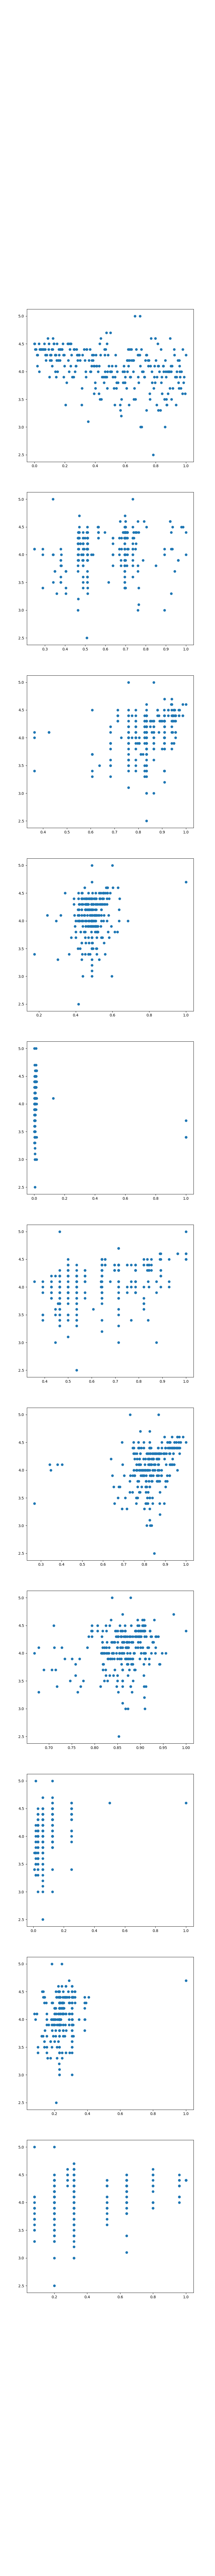

In [52]:
fig,ax = plt.subplots(model1.x_train.shape[1] - 1,1,figsize = (8,96))
print(f"model1.x_train.shape[1] = {model1.x_train.shape[1]}")
for i in range(model1.x_train.shape[1] - 1):
    ax[i].scatter(model1.x_train[:,i+1],model1.y_train)
plt.show()

# 3 b)

Features that have a scatter plot with points that are closely clustered around a straight line have a strong linear relationship with the rating. On the other hand, features that have a scatter plot with points that are randomly scattered with no discernible pattern have little or no impact on the rating.

We can see that most of the graph dont have a very strong linear relationship with the rating.

But the best amongst them is the first graph, i.e. the graph between Pixel Density and Rating

Other graphs are either randomly scattered or have clustered data around a area.